In [53]:
import json
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

## EDA를 위한 Data 전처리

In [9]:
# 기존 train, val에 사용되는 data: 58853개로(0.2에 해당하는 test는 사용 x)
with open('bootcamp/dataset/train_124.txt', 'r') as f:
    train_124 = f.readlines()
with open('bootcamp/dataset/val_124.txt', 'r') as f:
    val_124 = f.readlines()
train_124.extend(val_124)

train_58853_list = []
for path in train_124:
    train_58853_list.append(path.split('/')[-1][:-4] + 'txt')
len(train_58853_list)

58853

In [14]:
# 3rd run session -> session 0
def get_session(class_num):
    if class_num <= 8:
        session = 0
    elif class_num <=18:
        session = 1
    elif class_num <=28:
        session = 2
    elif class_num <=38:
        session = 3
    elif class_num <=47:
        session = 4
    elif class_num <=57:
        session = 5
    elif class_num <=67:
        session = 6
    elif class_num <=73:
        session = 7
    elif class_num <=83:
        session = 8
    elif class_num <=93:
        session = 9
    elif class_num <=103:
        session = 10
    elif class_num <=113:
        session = 11
    else:
        session = 12
    
    return session

In [275]:
img_ann_list = train_58853_list.copy()
label_img_df = pd.DataFrame(columns=[['img_name','object_num','box_mean_size','session', 'box_class_list']])
empty_txt_img_list = [] # txt파일 비어있는 경우
for i, img in tqdm(enumerate(img_ann_list)):
    if img == '.ipynb_checkpoints':
        continue
        
    with open(os.path.join('final-project-level2-cv-05/yolov7/dataset/labels',img), 'r') as f:
        data = f.readlines()  # class, x, y, w, h
        
    if len(data) == 0:
        empty_txt_img_list.append(img.split('.')[0] + '.' + img.split('.')[1] + '.jpg')
        continue
        
    box_size_list = []
    box_class_list = []
    box_center_coord_list = []
    box_w_h_list = []
    for box in data:
        box_w, box_h = box.split()[-2], box.split()[-1]
        box_class = box.split()[0]
        box_size = round(float(box_w) * float(box_h), 5)
        box_center_coord = (box.split()[1], box.split()[2])  # (center_x, center_y)
        box_size_list.append(box_size)
        box_class_list.append(box_class)
        box_center_coord_list.append(box_center_coord)
        box_w_h_list.append((box_w,box_h))

    img_name = img.split('.')[0] + '.' + img.split('.')[1]
    object_num = len(data)
    box_mean_size = np.mean(box_size_list)
    session = get_session(int(data[0].split()[0]))
    
    temp_df = pd.DataFrame([[img_name, object_num, box_mean_size, session, box_class_list, box_size_list, box_center_coord_list, box_w_h_list]], columns=[['img_name','object_num','box_mean_size','session','box_class_list','box_size_list', 'box_center_coord_list', 'box_w_h_list']])
    label_img_df = pd.concat([label_img_df, temp_df], ignore_index=True)

58853it [07:15, 135.26it/s]


In [276]:
 # 빈 txt파일이 874개, 즉 label이 존재하지 않는 data가 추가적으로 874개 존재
label_img_df.shape, len(empty_txt_img_list)

((58178, 8), 675)

In [277]:
label_img_df = label_img_df.reset_index()
# label_img_df.columns = [['img_id','img_name','object_num','box_mean_size','session','box_class_list','box_size_list', 'box_center_coord_list']]
# label_img_df['object_num'] = label_img_df['object_num'].apply(lambda x: x.astype(int)) # decsribe 값을 보기 위해
label_img_df.head()

,index,box_center_coord_list,box_class_list,box_mean_size,box_size_list,box_w_h_list,img_name,object_num,session
0,0,"[(0.41735691750127074, 0.16657659295023722), (...","[96, 95, 98]",0.001357,"[0.00117, 0.00145, 0.00145]","[(0.023237098330185547, 0.05038297869039194), ...",10_hik_204_1662356574.mov_280,3,10
1,1,"[(0.42151390483712187, 0.6157229690411526), (0...","[108, 108]",0.004645,"[0.00534, 0.00395]","[(0.05958477788750756, 0.0896950736206557), (0...",11_hik_204_1662358535.mov_1852,2,11
2,2,"[(0.4300414987216738, 0.6662794986918452), (0....","[93, 87]",0.004400,"[0.00654, 0.00226]","[(0.06145106489738339, 0.10643320117330637), (...",9_hik_205_1662348299.mov_3328,2,9
3,3,"[(0.3688957829300821, 0.4988406803914716)]",[49],0.010570,[0.01057],"[(0.07636364669860168, 0.1384511125270974)]",5_hik_203_1658977700.mov_2295,1,5
4,4,"[(0.4712918660287081, 0.48191489361702133), (0...","[42, 43]",0.003005,"[0.00467, 0.00134]","[(0.043062200956937795, 0.10851063829787234), ...",4_hik_205_1658973309.mov_165,2,4


In [43]:
# label_img_df['object_num'] = label_img_df['object_num'].apply(lambda x: x.astype(int)) # decsribe 값을 보기 위해

In [42]:
label_img_df.describe() # box_mean_size만 4등분하여 4개의 class로 분류

,index,box_mean_size,object_num
count,58178.000000,58178.000000,58178.000000
mean,29088.500000,0.005458,2.475076
std,16794.686317,0.004179,1.156493
min,0.000000,0.000150,1.000000
25%,14544.250000,0.002755,2.000000
50%,29088.500000,0.004424,2.000000
75%,43632.750000,0.006970,3.000000
max,58177.000000,0.159480,10.000000


# EDA

#### 목차

    - Label 존재 유무 분석
    - Class 분포
    - Session 분포
    - Image 내 object 개수
    - Class별 평균 box 크기
    - Box center 좌표 시각화
    - Session별 box center 좌표 시각화
    
    - CV strategy를 통해 얻은 train data EDA
        - 위와 EDA 항목 동일
        - + Class별 box aspect ratio(h/w)

### Label 존재 유무 분석

- label이 존재하지 않는 data가 약 10%정도라고 했지만, 실제 train에 활용되는 data에서 txt파일 자체가 존재하지 않는 data는 없고, txt파일이 비어있는 경우만 675개 존재하여, 약 1.1% 차지

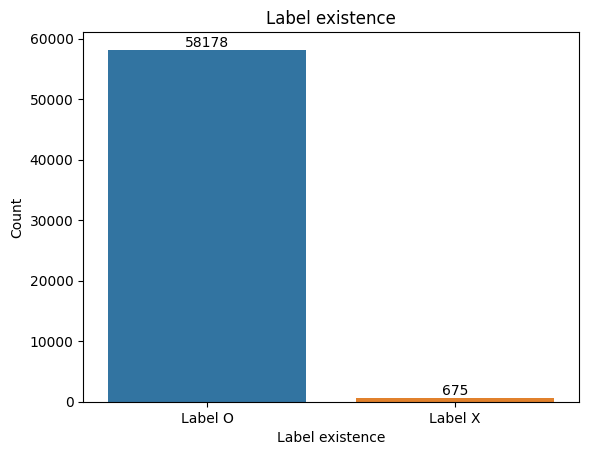

In [203]:
x = ['Label O', 'Label X' ]
y = [len(label_img_df), len(empty_txt_img_list)]
ax = sns.barplot(x=x, y=y)
ax.bar_label(ax.containers[0])
plt.title('Label existence')
plt.xlabel('Label existence')
plt.ylabel('Count')
plt.show()

### Class 분포

- 일부 class에 대해 class 불균형 존재
- data 개수가 적은 session이 존재하는 것으로 보임

In [158]:
class_list = []
for i, row in label_img_df.iterrows():
    for i in row.box_class_list:
        class_list.append(i)
len(class_list)

143995

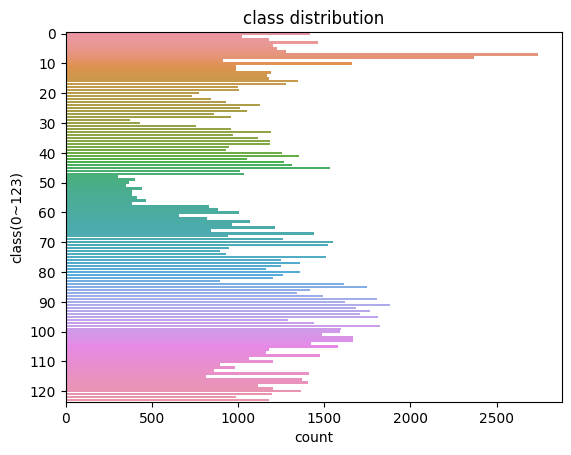

In [162]:
order = [str(i) for i in range(124)]
ax = sns.countplot(y=class_list, order=order)
ax.set_yticks([i*10 for i in range(0,13)])
plt.title('class distribution')
plt.ylabel('class(0~123)')
plt.show()

### Session 분포

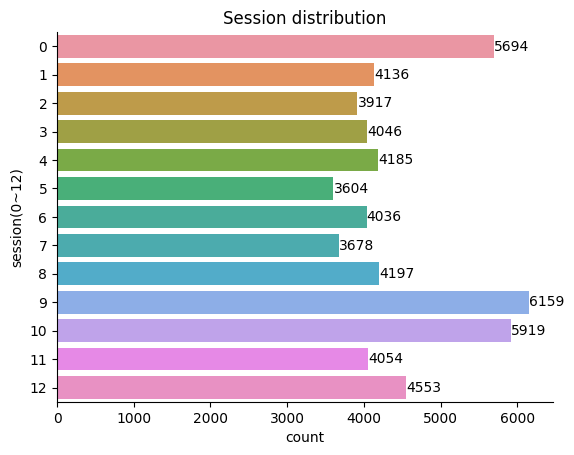

In [95]:
session_list = list(label_img_df.session.values.squeeze())
order = [i for i in range(13)]
ax = sns.countplot(y=session_list, order=order)
ax.bar_label(ax.containers[0])
plt.title('Session distribution')
plt.ylabel('session(0~12)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

### Image 내 object 개수

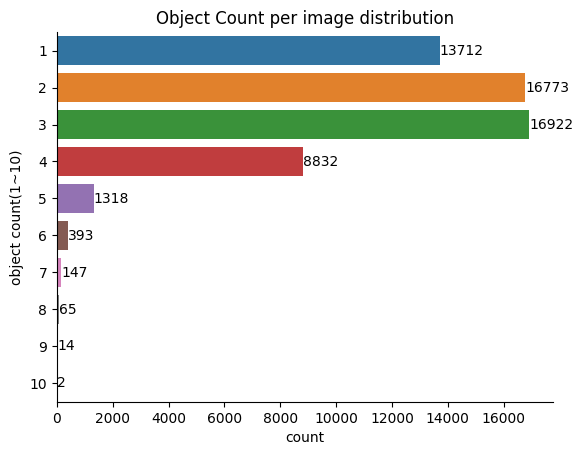

In [99]:
object_num_list = list(label_img_df.object_num.values.squeeze())
order = [i for i in range(1,11)]
ax = sns.countplot(y=object_num_list, order=order)
ax.bar_label(ax.containers[0])
plt.title('Object Count per image distribution')
plt.ylabel('object count(1~10)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

### Class별 평균 box 크기 

- class별 객체 평균 크기 상이
- 이미지 크기: 1

In [173]:
box_class_list = list(label_img_df.box_class_list.values.squeeze())
box_size_list = list(label_img_df.box_size_list.values.squeeze())
box_size_accum_list = [0 for _ in range(124)]
class_count_list = [0 for _ in range(124)]
for img in zip(box_class_list, box_size_list):
    class_list, size_list = img[0], img[1]
    for i in range(len(class_list)):
        box_cls = int(class_list[i])
        box_size = size_list[i]
        class_count_list[box_cls] += 1
        box_size_accum_list[box_cls] += box_size
box_mean_size_perclass_list = [box_size_accum_list[i]/class_count_list[i] for i in range(124)]
class_index_list = [i for i in range(124)]
box_mean_size_df = pd.DataFrame({'class':class_index_list, 'box_mean_size':box_mean_size_perclass_list})

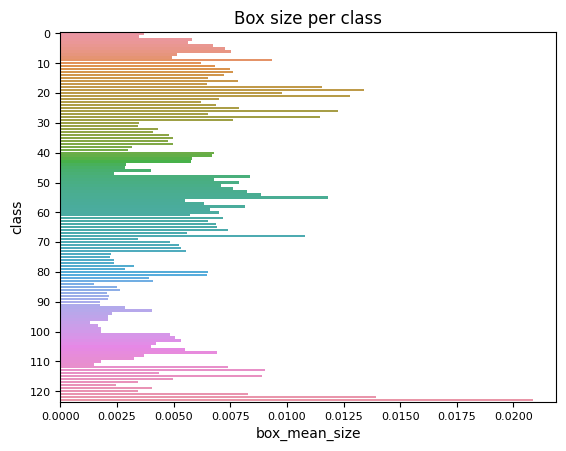

In [174]:
ax = sns.barplot(data=box_mean_size_df, y='class', x='box_mean_size', orient='h')
ax.set_yticks([i*10 for i in range(0,13)])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Box size per class')
plt.show()

### Box center 좌표 시각화

In [179]:
box_center_coord_list = list(label_img_df.box_center_coord_list.values.squeeze())

In [189]:
center_x_list = []
center_y_list = []
for i, img in enumerate(box_center_coord_list):
    for box_center in img:
        center_x, center_y = float(box_center[0]), float(box_center[1])
        center_x_list.append(center_x*1920)
        center_y_list.append(center_y*1080)

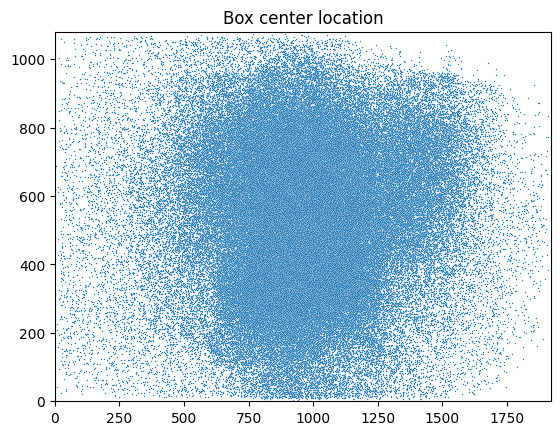

In [202]:
sns.scatterplot(x=center_x_list, y=center_y_list, s=1)
plt.xlim(0,1920)
plt.ylim(0,1080)
plt.title('Box center location')
plt.show()

### Session별 box center 좌표 시각화

In [206]:
box_center_coord_list = list(label_img_df.box_center_coord_list.values.squeeze())
session_list = list(label_img_df.session.values.squeeze())

In [212]:
center_x_dict = {session:[] for session in range(13)}
center_y_dict = {session:[] for session in range(13)}
for i, img in enumerate(box_center_coord_list):
    session = session_list[i]
    for box_center in img:
        center_x, center_y = float(box_center[0]), float(box_center[1])
        center_x_dict[session].append(center_x*1920)
        center_y_dict[session].append(center_y*1080)

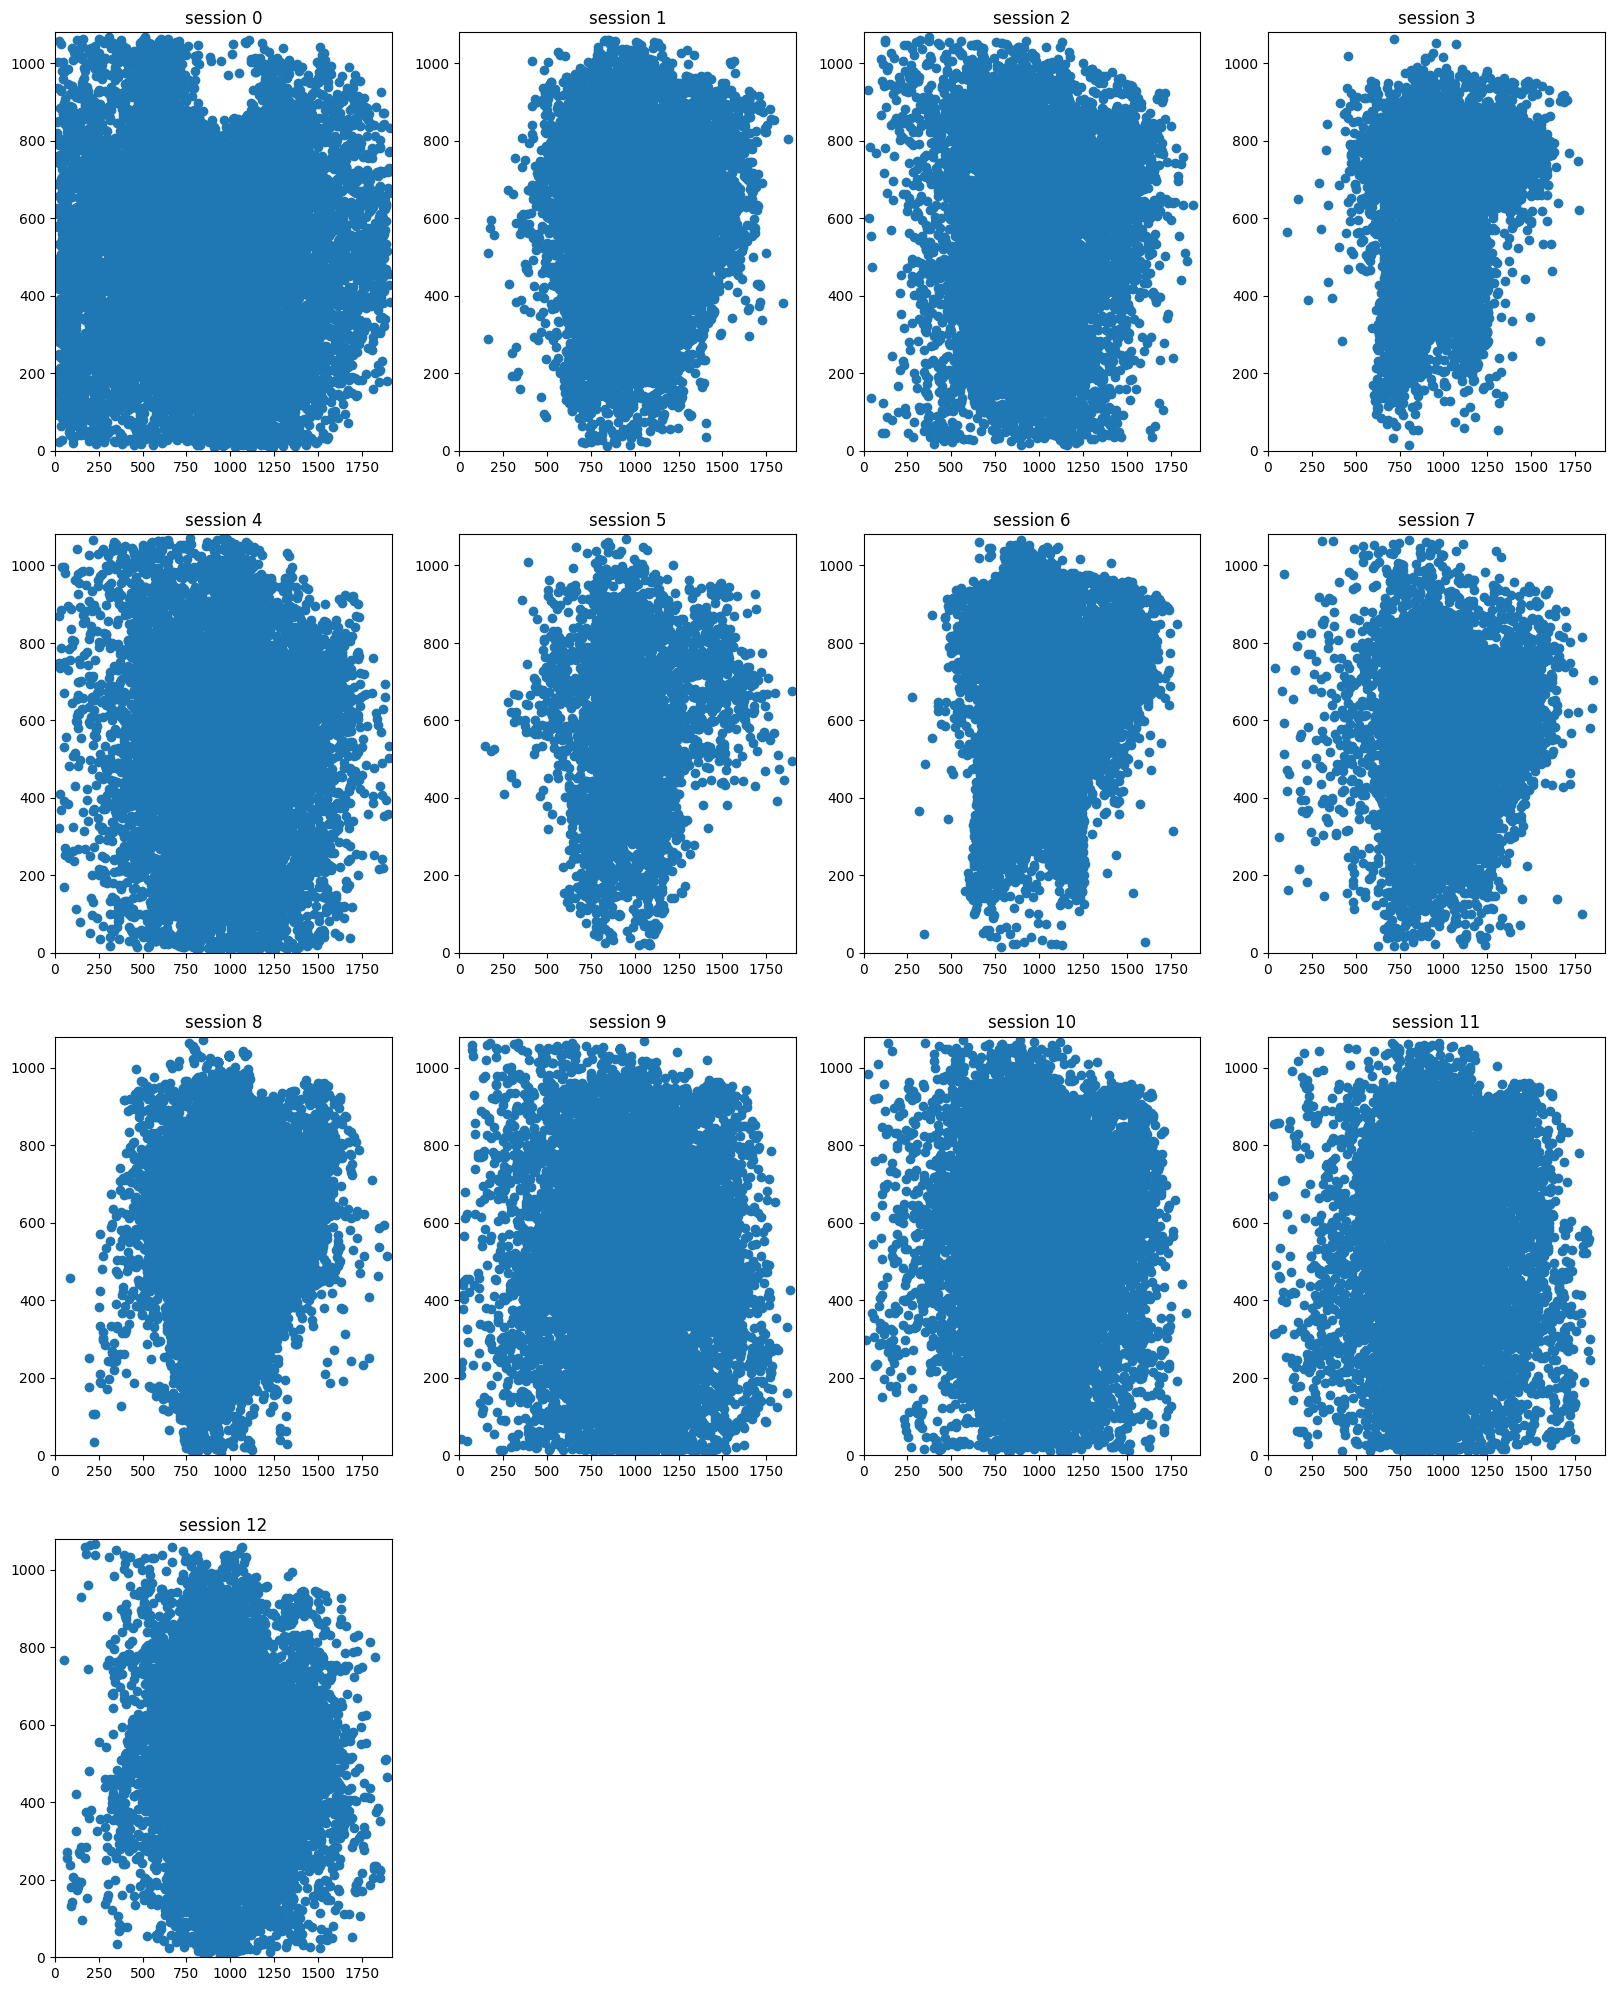

In [215]:
sessions = [i for i in range(13)]
fig = plt.figure(figsize=(20,25))
for session in sessions:
    plt.subplot(4, 4, session+1)
    plt.scatter(x=center_x_dict[session], y=center_y_dict[session])
    plt.title(f'session {session}')
    plt.xlim(0,1920)
    plt.ylim(0,1080)

# CV strategy(mutlilabel stf k fold) 통해 얻은 train(약 23000개) data에 대한 EDA

- label_img_df에서 실제 train에 사용될 이미지만 필터링

In [217]:
with open('pkt_train_124.txt', 'r') as f:
    train = f.readlines()

In [278]:
new_train_list = []
for img_path in train:
    img_name = img_path.split('/')[-1][:-5]
    new_train_list.append(img_name)
len(new_train_list)

25856

In [279]:
new_train_idx_list = []
for i,row in label_img_df.iterrows():
    img_name = row['img_name']
    if img_name in new_train_list:
        new_train_idx_list.append(i)
len(new_train_idx_list)

23271

In [280]:
new_label_img_df = label_img_df.loc[new_train_idx_list]
new_label_img_df.shape

(23271, 9)

### Label 존재 유무 분석

- cv strategy 수립 시, label이 존재하지 않는 이미지를 의도적으로 약 10% 추가

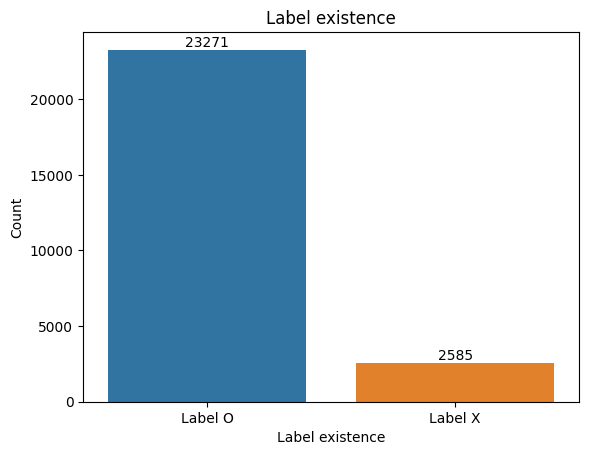

In [235]:
x = ['Label O', 'Label X' ]
y = [len(new_label_img_df), 2585]
ax = sns.barplot(x=x, y=y)
ax.bar_label(ax.containers[0])
plt.title('Label existence')
plt.xlabel('Label existence')
plt.ylabel('Count')
plt.show()

### Class 분포

In [236]:
class_list = []
for i, row in new_label_img_df.iterrows():
    for i in row.box_class_list:
        class_list.append(i)
len(class_list)

57666

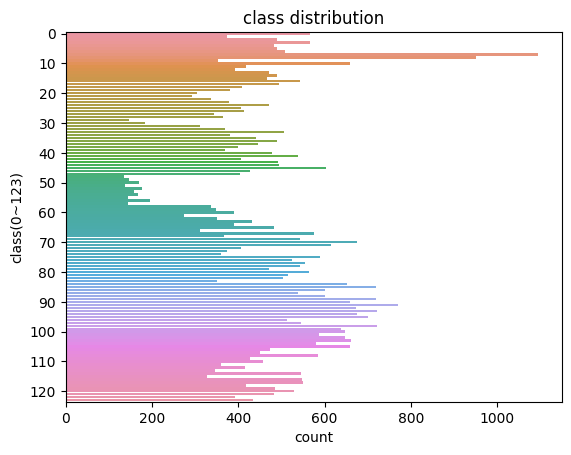

In [237]:
order = [str(i) for i in range(124)]
ax = sns.countplot(y=class_list, order=order)
ax.set_yticks([i*10 for i in range(0,13)])
plt.title('class distribution')
plt.ylabel('class(0~123)')
plt.show()

### Session 분포

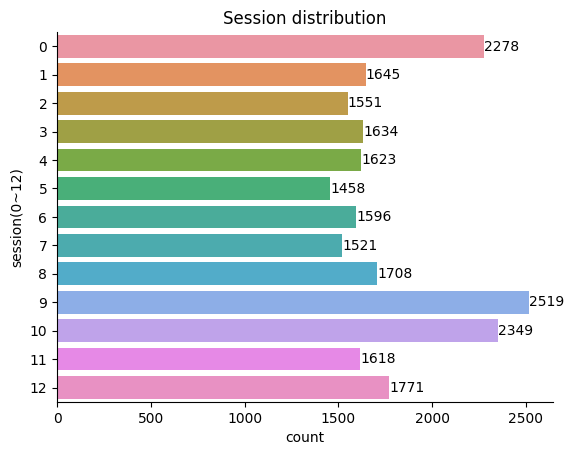

In [238]:
session_list = list(new_label_img_df.session.values.squeeze())
order = [i for i in range(13)]
ax = sns.countplot(y=session_list, order=order)
ax.bar_label(ax.containers[0])
plt.title('Session distribution')
plt.ylabel('session(0~12)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

### Image 내 object 개수

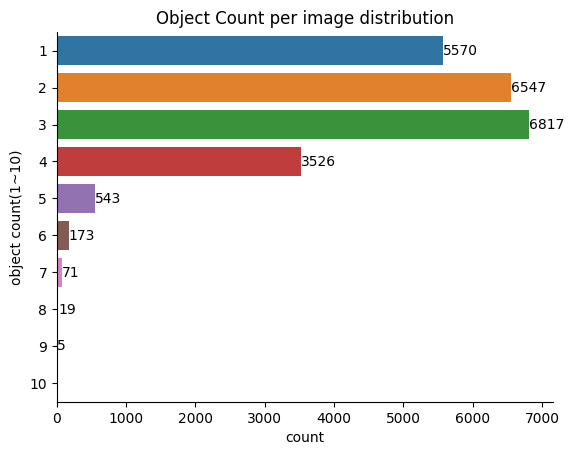

In [239]:
object_num_list = list(new_label_img_df.object_num.values.squeeze())
order = [i for i in range(1,11)]
ax = sns.countplot(y=object_num_list, order=order)
ax.bar_label(ax.containers[0])
plt.title('Object Count per image distribution')
plt.ylabel('object count(1~10)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

### Class별 평균 box 크기

In [241]:
box_class_list = list(new_label_img_df.box_class_list.values.squeeze())
box_size_list = list(new_label_img_df.box_size_list.values.squeeze())
box_size_accum_list = [0 for _ in range(124)]
class_count_list = [0 for _ in range(124)]
for img in zip(box_class_list, box_size_list):
    class_list, size_list = img[0], img[1]
    for i in range(len(class_list)):
        box_cls = int(class_list[i])
        box_size = size_list[i]
        class_count_list[box_cls] += 1
        box_size_accum_list[box_cls] += box_size
box_mean_size_perclass_list = [box_size_accum_list[i]/class_count_list[i] for i in range(124)]
class_index_list = [i for i in range(124)]
box_mean_size_df = pd.DataFrame({'class':class_index_list, 'box_mean_size':box_mean_size_perclass_list})

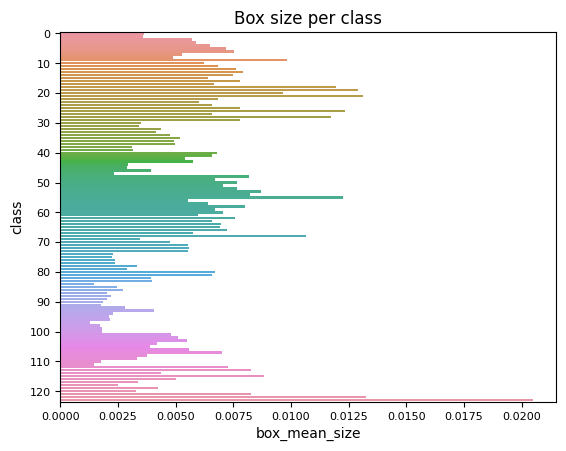

In [242]:
ax = sns.barplot(data=box_mean_size_df, y='class', x='box_mean_size', orient='h')
ax.set_yticks([i*10 for i in range(0,13)])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Box size per class')
plt.show()

### Box center 좌표 시각화

In [245]:
box_center_coord_list = list(new_label_img_df.box_center_coord_list.values.squeeze())

In [246]:
center_x_list = []
center_y_list = []
for i, img in enumerate(box_center_coord_list):
    for box_center in img:
        center_x, center_y = float(box_center[0]), float(box_center[1])
        center_x_list.append(center_x*1920)
        center_y_list.append(center_y*1080)

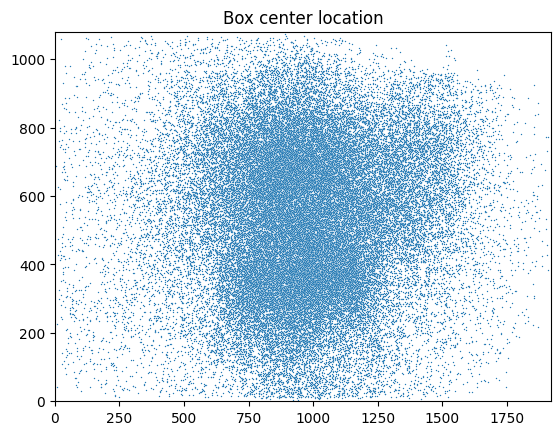

In [247]:
sns.scatterplot(x=center_x_list, y=center_y_list, s=1)
plt.xlim(0,1920)
plt.ylim(0,1080)
plt.title('Box center location')
plt.show()

### Session별 box center 좌표 시각화

In [248]:
box_center_coord_list = list(new_label_img_df.box_center_coord_list.values.squeeze())
session_list = list(new_label_img_df.session.values.squeeze())

In [249]:
center_x_dict = {session:[] for session in range(13)}
center_y_dict = {session:[] for session in range(13)}
for i, img in enumerate(box_center_coord_list):
    session = session_list[i]
    for box_center in img:
        center_x, center_y = float(box_center[0]), float(box_center[1])
        center_x_dict[session].append(center_x*1920)
        center_y_dict[session].append(center_y*1080)

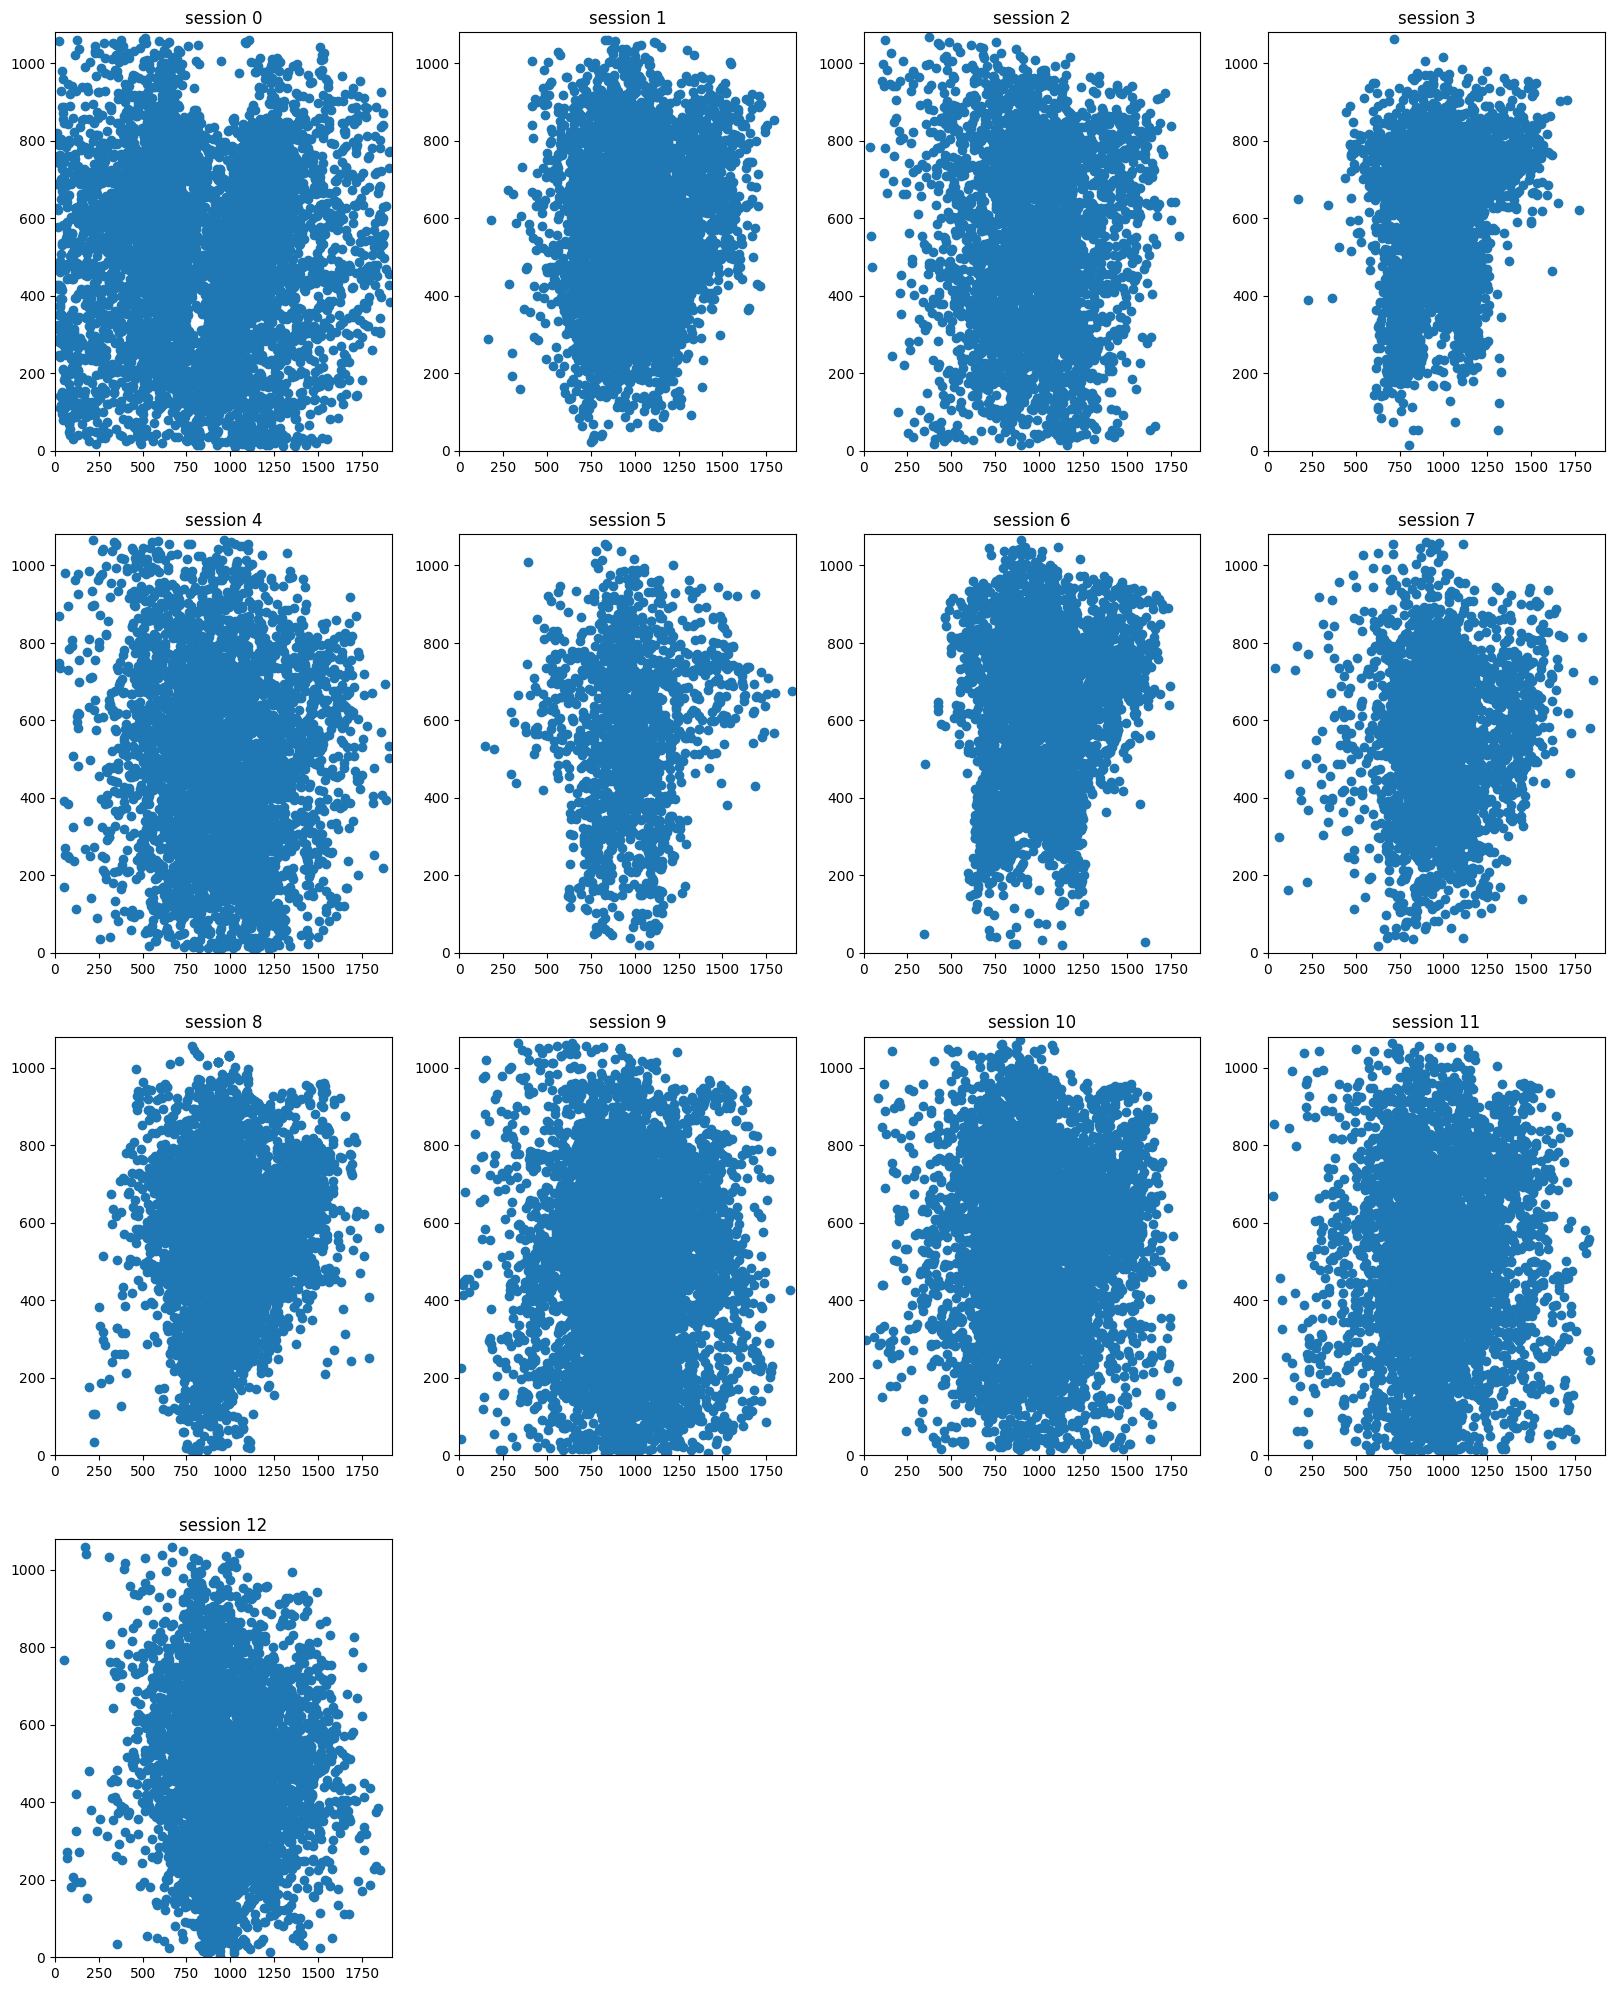

In [250]:
sessions = [i for i in range(13)]
fig = plt.figure(figsize=(20,25))
for session in sessions:
    plt.subplot(4, 4, session+1)
    plt.scatter(x=center_x_dict[session], y=center_y_dict[session])
    plt.title(f'session {session}')
    plt.xlim(0,1920)
    plt.ylim(0,1080)

### Class별 box aspect ratio(h/w)

In [333]:
box_class_list = list(new_label_img_df.box_class_list.values.squeeze())
box_w_h_list = list(new_label_img_df.box_w_h_list.values.squeeze())
box_w_h_accum_list = [0 for _ in range(124)]
class_count_list = [0 for _ in range(124)]
for img in zip(box_class_list, box_w_h_list):
    class_list, w_h_list = img[0], img[1]
    for i in range(len(class_list)):
        box_cls = int(class_list[i])
        box_w, box_h = w_h_list[i]
        aspect_ratio = float(box_h)/float(box_w)
        class_count_list[box_cls] += 1
        box_w_h_accum_list[box_cls] += aspect_ratio

box_mean_ratio_perclass_list = [box_w_h_accum_list[i]/class_count_list[i] for i in range(124)]
class_index_list = [i for i in range(124)]
box_mean_ratio_df = pd.DataFrame({'class':class_index_list, 'box_mean_ratio':box_mean_ratio_perclass_list})

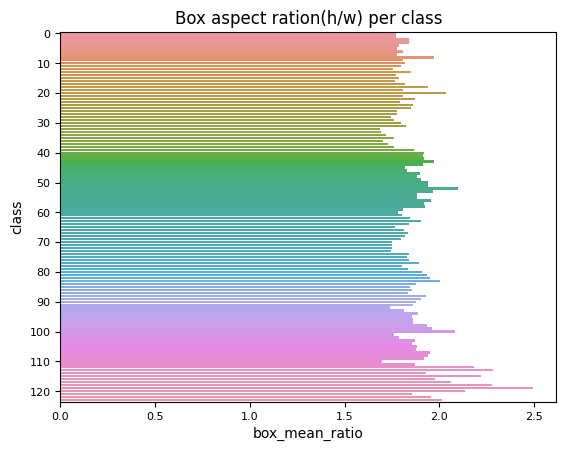

In [334]:
ax = sns.barplot(data=box_mean_ratio_df, y='class', x='box_mean_ratio', orient='h')
ax.set_yticks([i*10 for i in range(0,13)])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Box aspect ration(h/w) per class')
plt.show()

In [342]:
aspect_ratio_list = []
for i,row in new_label_img_df.box_w_h_list.iterrows():
    for box in row.box_w_h_list:
        box_w, box_h = float(box[0]), float(box[1])
        aspect_ratio_list.append(box_h/box_w)

In [352]:
aspect_df = pd.DataFrame({'aspect_ratio':aspect_ratio_list})
aspect_df.describe()

,aspect_ratio
count,57666.000000
mean,1.869773
std,0.908556
min,0.118519
25%,1.323746
50%,1.704432
75%,2.174599
max,28.503705


In [367]:
aspect_df.sort_values(by='aspect_ratio').iloc[5700]

aspect_ratio    1.004586
Name: 7461, dtype: float64

- 전체 box의 90%가 aspect ratio가 1보다 큼, 즉 세로로 김